# Long Homework 2

## AMPTH 207: Stochastic Methods for Data Analysis, Inference and Optimization
 
### Long Homework 2
 
**Harvard University**  
**Spring 2017**  
**Instructor: Rahul Dave**  
**Due Date:** Thursday, March 23rd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1. The Ising Model with Metropolis and Gibbs

The true power of the Monte Carlo method becomes apparent when we deal with integrals over many dimensions, such as those often found in statistical physics. In this exercise we consider the 2-D Ising model, which is a very idealized representation of a ferromagnetic metal. The model consists of an $L\times L$ lattice of spins  $s_{ij}$ (with $i, j = 1, \ldots , L$) each of which can take only two values, up (s$_{ij}$ = 1) and down (s$_{ij}$ = -1). The total energy for the system is taken to be:

$$
E = -\sum_{ij} \frac{1}{2} s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  
$$

where s$_{\rm{up}(ij)}$ denotes the spin immediately above s$_{ij}$ in the grid, s$_{\rm{right}(ij)}$ the spin immediately to its right, and so on. We see that the configurations where nearby spins are aligned are energetically preferred. When the system is in thermal equilibrium at the temperature T, the probability of finding it in a given configuration $\{s\}=(s_{11}, s_{12}, \ldots)$ of the spins is given by the Boltzmann factor,

$$W\{{s} \} = Z^{-1} e^{ -\beta E[ \{ s \} ] } $$

where Z is given by the sum of the exponential over all possible spin configurations, and where $\beta$ is the inverse temperature (measured in units of the Boltzmann constant $k_B$). The values at thermal equilibrium of all the macroscopic quantities for the system (such as the magnetization $M =\sum_{ij} s_{ij}$ ) are found by averaging over all spin configurations, weighted by W. For instance,

$$ 
\left< M \right> = \sum_{s_{11}=\pm 1} \sum_{s_{12}=\pm 1} \ldots \sum_{s_{LL}=\pm 1} \left[ W\{s\} \times \sum_{ij} s_{ij} \right] 
$$

where $\left<M\right>$ denotes such an ensemble average. The above equation is effectively out of the reach of standard techniques, but not of Monte Carlo.

### Metropolis

The Metropolis algorithm generates a sequence of configurations that have approximately the required probability distribution. This is how it works:

* We start with a completely random spin configuration $\{s \}$ (each spin chosen to be up or down with 50% probability).

* To generate the next configuration in the sequence, we select a point $(i, j$) in the lattice, and we compute the energy change $\Delta E$ by flipping the corresponding spin, s$_{ij}$,

$$
\Delta E = 2s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  
$$

* if E is zero or negative, we flip the spin (i.e., we always accept changes that lower the total energy). If E is positive, we flip the spin with probability $P (\Delta E) = \exp(-\beta \Delta E)$. We repeat this Metropolis step L $\times$ L times, once for each location $(i, j)$ in the lattice. (The repeated Metropolis steps constitute a Metropolis sweep.) The updated points are used as they become available.

### Gibbs
Since the spins are correlated with their neighbors, it is perhaps more natural to adopt a Gibbs approach. If we select a node $s_{ij}$ in the lattice, it is easy to show using the equations above that the full conditional probability of it having a spin of 1 given all the other spins is:

$$
P(s_{ij}=1|\textrm{all other spins}) = \frac{1}{1+\exp\left(-2\beta(s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)})\right)}
$$

So the Gibbs model is to loop over each spin in the lattice, and with the above probability set the current spin to 1, otherwise setting it to −1. Actually, as in general there will be spacial correlations, it makes more sense to randomly select the spin each time.


Regardless of the sampling method, the Monte Carlo estimate of the ensemble average of a macroscopic quantity (say M) is then

$$ \left< M \right> = \frac{1}{N} \sum_{k=1}^{N} \sum_{ij} s_{ij}^{(k)} $$

where $ s_{ij}^{(k)}$ is the sequence of the spin configurations obtained by repeatedly applying Metropolis iteration to the initial configuration. It is usually best to omit a certain number of configurations at the beginning of the sequence; these are not distributed with the proper probabilities, because the system has not yet reached thermal equilibrium. (How long the system takes to thermalize depends on several factors, and the length of the required warm-up period is usually estimated empirically.

### Part A
1) Make the standard assumption of periodic boundary conditions, write a program that generates a Metropolis sequence of spin configurations for the  $100 \times 100$ L 2-D Ising model, and that visualizes them on the screen as they are computed.

2) With the same baoundary assumptions, write a program that generates a Gibbs sequence of spin configurations for the  $100 \times 100$ L 2-D Ising model, and that visualizes them on the screen as they are computed.

3) Use the Gibbs estimates to evaluate the energy per particle and magnetization per particle of the 2-D Ising model as a function of temperature, then plot them. At what value of $\beta$ do you observe the phase transition? *Hint: first plot the magnetizations and energies as a function of the iteration to make sure they have stabilized*.

### Part B

Now add an external field of magnitud $h>0$, which can be interpreted as an energy term added to each spin, and repeat the experiment

In this case:

$$
E = -\sum_{ij} \frac{1}{2} s_{ij}  \left[ s_{\rm{up}(ij)} + s_{\rm{down}(ij)} + s_{\rm{left}(ij)} + s_{\rm{right}(ij)} \right]  - \sum_{ij} h_{ij} s_{ij}
$$

where $h_{ij}$ is the magnitud of the external field in the $(i,j)$ position of the lattice (assumed to be constant over the entire lattice), and $s_{ij}$ the spin in that location in the lattice. Note that this implies that adjancent spins with the same sign result lower energy than adjacent spins with opposite signs. Also, if the spin direction and the direction of the external magnetic field are aligned, the energy is reduced.

Use a low temperature ($\beta=1$), and plot the magnetization as a function of the Gibbs itearation for the following values of the external field: $h = -1.0,-0.1,-0.05,0.05,0.1,1.0$ Discuss  about the effect of adding this external field in the magnetization properties.



## Problem 2. Image de-noising

Suppose we observe a "noisy" image $Y \in \{-1,1\}^L$ (a lattice) based on a "noise-free" image $Z \in \{-1,1\}^L$. A plausible choice for modelling the noise is using independent bit-flips:


$$
P(Y_i = y_i|Z = z) = P(Y_i = y_i|Z_i = z) = \left\{
        \begin{array}{ll}
            q & \quad y_i = z_i \\
            1-q & \quad y_i \neq z_i
        \end{array}
    \right.
$$

We want to recover $Z$, the original "noise-free" image. The problem is hard unless we make an assumption about Z. We will assume that the image is "clumpy", i.e., that neighboring pixels are correlated. We can translate this assumption directly into the prior probability of $Z$:

$$
P(Z = z) \propto \exp \left( \sum_{i,j}z_iz_j\right)
$$

Looks familiar? Yes, that is an Ising model with no external field! Now, applying Bayes' rule and setting $h=\log(g/(1-q)) = \rm{logit}(q)$ we can write the posterior probability as:

$$
\log P(Z=z|Y=y) \propto \exp \left( \sum_{i,j}z_iz_j + \sum_i hz_iy_i \right)
$$

This is exactly an Ising model with a varying external field $hy_i$. We only need to set $\beta=2$ and halve $h$.

Using a Gibbs sampler, de-noise the image contained in the file "noisy_image.pickle" and plot your result. How many Gibbs iterations do you need in order to accomplish a clean image?

In [56]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


### Solution

Lets first write the code for the metropolis step:

In [303]:
def metropolis_sweep(s, beta, extfield, order, L=100):
    
    def delta_E(i,j,L=100):
        delta_energy = 2*s[i,j]*(s[(i-1)%L,j] + s[(i+1)%L,j] + s[i,(j-1)%L] + s[i,(j+1)%L]) \
        + 2*extfield*s[i,j]
        return delta_energy
 
    u = np.random.uniform(size=(L,L))
    for i,j in order:
        dE = delta_E(i,j)
        #print(dE)
        if (dE <= 0) or (u[i,j] <= np.exp(-beta*dE)):
            s[i,j] *= -1
            

In [304]:
def gibbs_sweep(s, beta, extfield, order, L=100):
    
    def local_E(i,j,L=100):
        return extfield + s[(i-1)%L,j] + s[(i+1)%L,j] + s[i,(j-1)%L] + s[i,(j+1)%L]
    
    u = np.random.uniform(size=(L,L))
    for i,j in order:
        #print(local_E(i,j))
        p = 1 / (1 + np.exp(-2 * beta * local_E(i,j))) # conditional probability
        #print(p)
        if (u[i,j] <= p):
            s[i,j] = 1
        else:
            s[i,j] = -1
    

Note that we perform the updates in a componentwise fashion. And now here is some code for making the plots:

In [305]:
def plot_spins(s, f, ax, i, beta, L=100, clear_figure=False):
    x,y = np.meshgrid(range(L),range(L))
    x,y = x[s>0], y[s>0]
    #ax.cla()
    ax.scatter(x,y,marker='.',alpha=.5)
    plt.xlim([0,L])
    plt.ylim([0,L])
    plt.title(r'Spins at Iteration %d, $\beta$ = %.3f' % (i+1, beta))
    if clear_figure:
        clear_output()
        

Functions for the mean magnetization and the mean energy for a sweep:

In [306]:
def M(s):
    return np.mean(s)

def E(s, L=100):
    s_up = s.copy()
    s_up[0,:], s_up[1:,:] = s[L-1,:],s[:L-1,:]
    s_down = s.copy()
    s_down[L-1,:], s_down[:L-1,:] = s[0,:],s[1:,:]
    s_left = s.copy()
    s_left[:,0], s_left[:,1:] = s[:,L-1],s[:,:L-1]
    s_right = s.copy()
    s_right[:,L-1], s_right[:,:L-1] = s[:,0],s[:,1:]
    
    return np.mean(-1./2*s*(s_up+s_down+s_left+s_right))

Now let's write code that runs the Ising model

In [307]:
def run_ising_model(N_sweeps, beta, extfield, plot_freq=0, L=100, random_init=True, use_gibbs=True):
    #initialization
    if random_init:
        #set spins on grid randomly to 1 or -1
        s = 2*np.random.random_integers(low=0, high=1, size=(L,L)) - 1
    else:
        #otherwise set spins to 1
        s = np.ones((L,L))
    
    #set up the plot
    # a set of tuples (i,j) for each point in the grid.
    order = [(i,j) for i in range(L) for j in range(L)]
    magnetization = [M(s)]
    energy = [E(s)]
    for i in arange(N_sweeps):
        np.random.shuffle(order)
        if use_gibbs:
            gibbs_sweep(s, beta, extfield, order)
        else:
            metropolis_sweep(s, beta, extfield, order)
        
        magnetization.append(M(s))
        energy.append(E(s))
        
        if plot_freq and ((i+1) % plot_freq) == 0:
            f, ax = plt.subplots(figsize=(6,6))
            plot_spins(s, f, ax, i, beta)
            
    plt.close()
    
    return (magnetization, energy)


Let us first try a high temperature system. Let's see what happens to the energy per particle and magnetization as the system evolves.

In [319]:
%%time

mag_1, energy_1 = run_ising_model(2000, 1.0, -0, 0,use_gibbs=False)
mag_2, energy_2 = run_ising_model(2000, 1.0, -0, 0)


/Users/jmartine/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


CPU times: user 3min 23s, sys: 1.29 s, total: 3min 24s
Wall time: 3min 29s


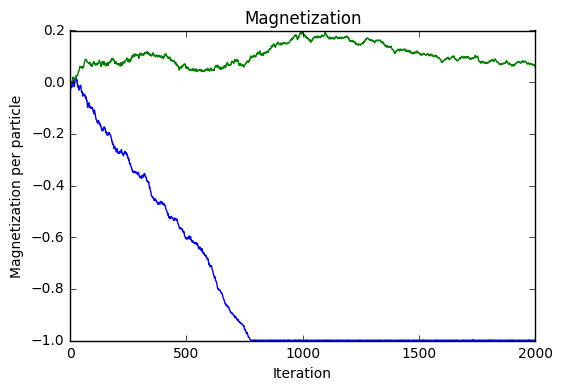

In [320]:
plt.plot(mag_1)
plt.plot(mag_2)
plt.xlabel('Iteration')
plt.ylabel('Magnetization per particle')
plt.title('Magnetization')


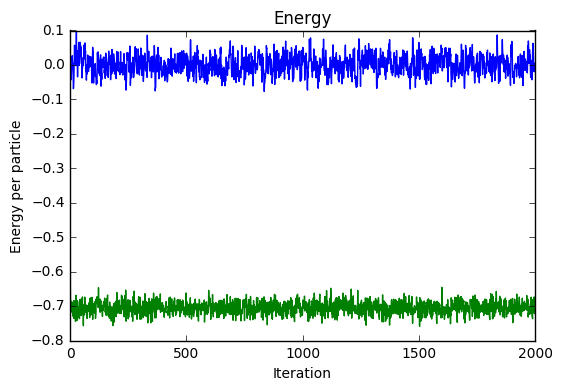

In [177]:
plt.plot(mag_1)
plt.xlabel('Iteration')
plt.ylabel('Magnetization per particle')
plt.title('Magnetization')
#plt.show()

plt.plot(energy_1)
plt.xlabel('Iteration')
plt.ylabel('Energy per particle')
plt.title('Energy')
#plt.show()

The initially unmagnetized system remains unmagnetized, and the energy very quickly reaches a low. Now let us see the case of a low tempreature. Let's do $\beta = 1.0$

In [178]:
mags={}
energies={}
mags[0.25]=mag_1
energies[0.25]=energy_1

/Users/jmartine/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


CPU times: user 3min 48s, sys: 1.05 s, total: 3min 49s
Wall time: 3min 55s


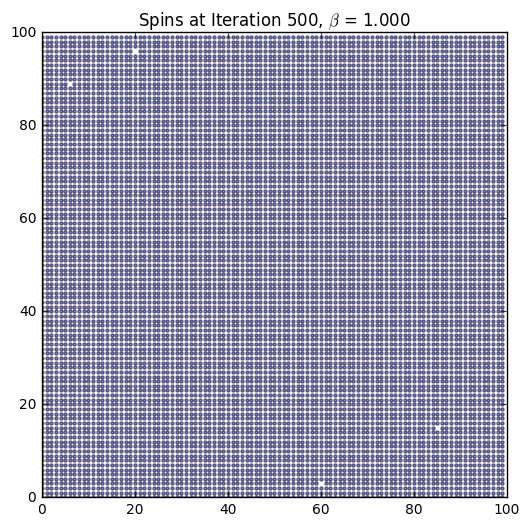

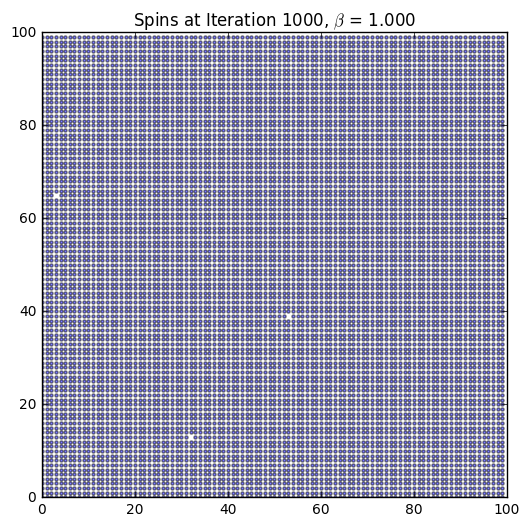

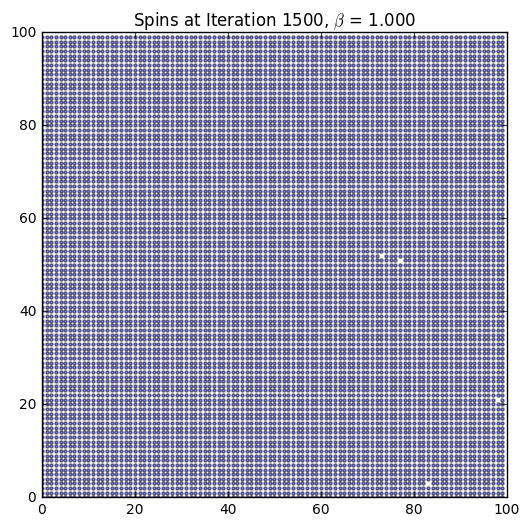

In [179]:
%%time

mags[1.0], energies[1.0] = run_ising_model(2000, 1., 0.0, 500)

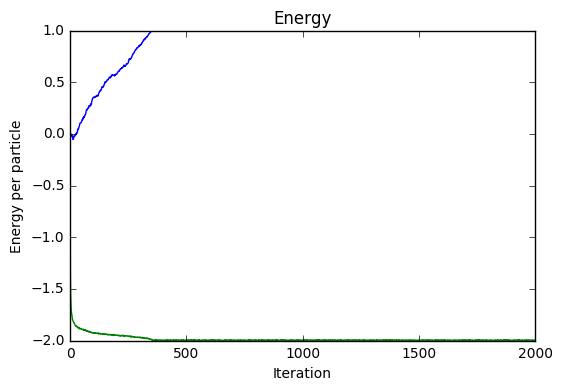

In [180]:
plt.plot(mags[1.0])
plt.xlabel('Iteration')
plt.ylabel('Magnetization per particle')
plt.title('Magnetization')
#plt.show()

plt.plot(energies[1.0])
plt.xlabel('Iteration')
plt.ylabel('Energy per particle')
plt.title('Energy')
#plt.show()

With a low temperature, the material becomes magnetized very quickly as well. At what temperature does the phase transition occurr? To find out, let's try different $\beta$:

In [181]:
for beta in [0.35, 0.5, 0.65, 0.8]:
    mags[beta], energies[beta] = run_ising_model(2000, beta,0.0)

/Users/jmartine/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


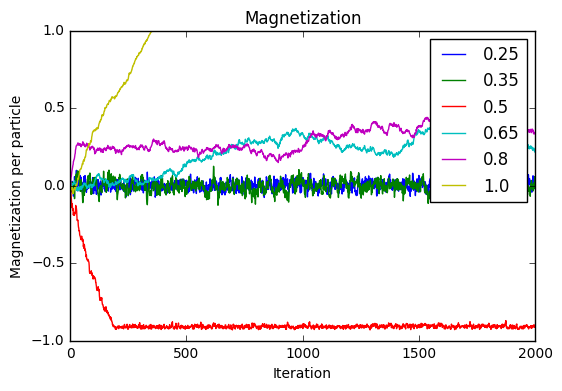

In [182]:
for beta in [0.25, 0.35, 0.5, 0.65, 0.8, 1.0]:
    plt.plot(mags[beta], label=str(beta))
plt.xlabel('Iteration')
plt.ylabel('Magnetization per particle')
plt.title('Magnetization')
plt.legend()

### Denosing

In [321]:
# Load image
from scipy import misc
import glob

for image_path in glob.glob("denoising.png"):
    image = imread(image_path)
    
image[image==0.0] = -1.

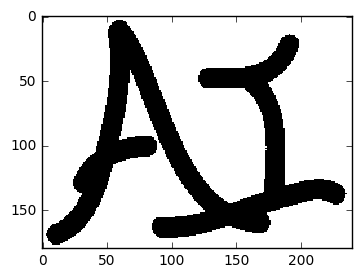

In [322]:
fig, axes = plt.subplots(figsize=(5,3))
axes.imshow(image, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

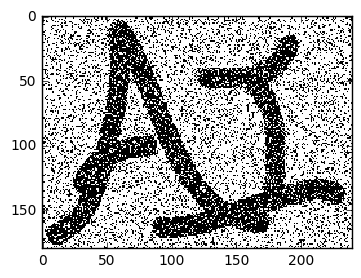

In [323]:
q = 0.8
noise = np.random.random(size = image.size).reshape(image.shape) > q
noisy = np.array(image)
noisy[noise] = -noisy[noise]
fig, axes = plt.subplots(figsize=(5,3))
axes.imshow(noisy, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

In [324]:
import pickle
pickle.dump( noisy, open( "noisy_image.pickle", "wb" ) )

In [278]:
def denoise_gibbs_sweep(s, beta, extfield, order):
    
    def local_E(i,j):
        return extfield[i,j] + s[(i-1)%s.shape[0],j] + s[(i+1)%s.shape[0],j] \
        + s[i,(j-1)%s.shape[1]] + s[i,(j+1)%s.shape[1]]
    
    u = np.random.uniform(size=(s.shape[0],s.shape[1]))
    for i,j in order:
        #print(local_E(i,j))
        p = 1 / (1 + np.exp(-2 * beta * local_E(i,j))) # conditional probability
        #print(p)
        if (u[i,j] <= p):
            s[i,j] = 1
        else:
            s[i,j] = -1

In [279]:
q = 0.8
h = 0.5 * np.log(q / (1-q))
External_Field = h*noisy

In [280]:
def IsingDenoise(noisy, N_sweeps, beta, extfield):
    #initialization
    s = noisy
    
    #set up the plot
    # a set of tuples (i,j) for each point in the grid.
    order = [(i,j) for i in range(noisy.shape[0]) for j in range(noisy.shape[1])]
    
    for i in arange(N_sweeps):
        np.random.shuffle(order)
        denoise_gibbs_sweep(s, beta, extfield, order)
        
        
    return s

In [281]:
%%time

denoised = IsingDenoise(noisy,40, 2.0, External_Field)

CPU times: user 9 s, sys: 34.4 ms, total: 9.03 s
Wall time: 9.06 s


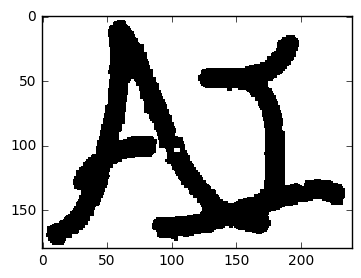

In [282]:
fig, axes = plt.subplots(figsize=(5,3))
axes.imshow(denoised, cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)